In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('BTC2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 7:3
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=365).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [5]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 8332.364531507836
MAPE: 22.414539946381957
MSE: 69428298.68592979


### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    39448.778039
1816    41499.738020
1817    41604.432450
1818    42272.811242
1819    40696.817092
1820    37829.789514
1821    38076.158057
1822    36472.764009
1823    36036.779639
1824    35864.105192
1825    35261.373642
1826    37451.521846
1827    36941.264753
1828    37939.937312
1829    36895.465940
1830    37199.487264
1831    37173.057377
1832    38170.182103
1833    38244.899691
1834    39404.806402
1835    39953.749943
1836    40816.432086
1837    39075.777645
1838    41292.318773
1839    40105.414975
1840    38469.468954
1841    38692.020186
1842    39791.419646
1843    39253.954446
1844    39936.266228
1845    39884.603808
dtype: float64


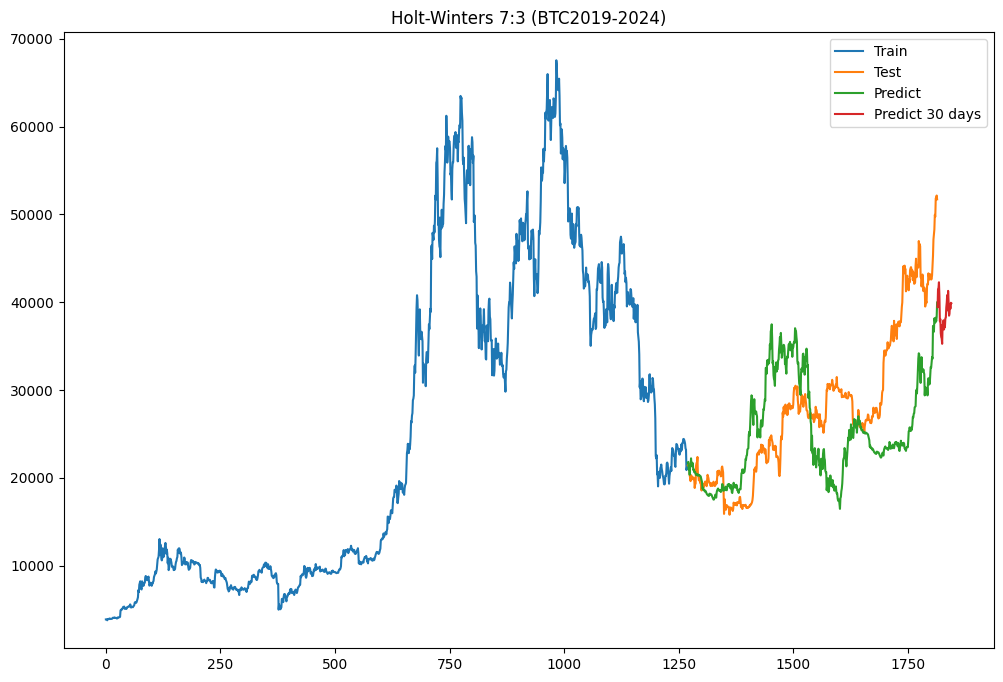

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    39448.778039
1816    41499.738020
1817    41604.432450
1818    42272.811242
1819    40696.817092
            ...     
1871    41523.552808
1872    40830.108737
1873    40316.037459
1874    38103.200160
1875    37761.827791
Length: 61, dtype: float64


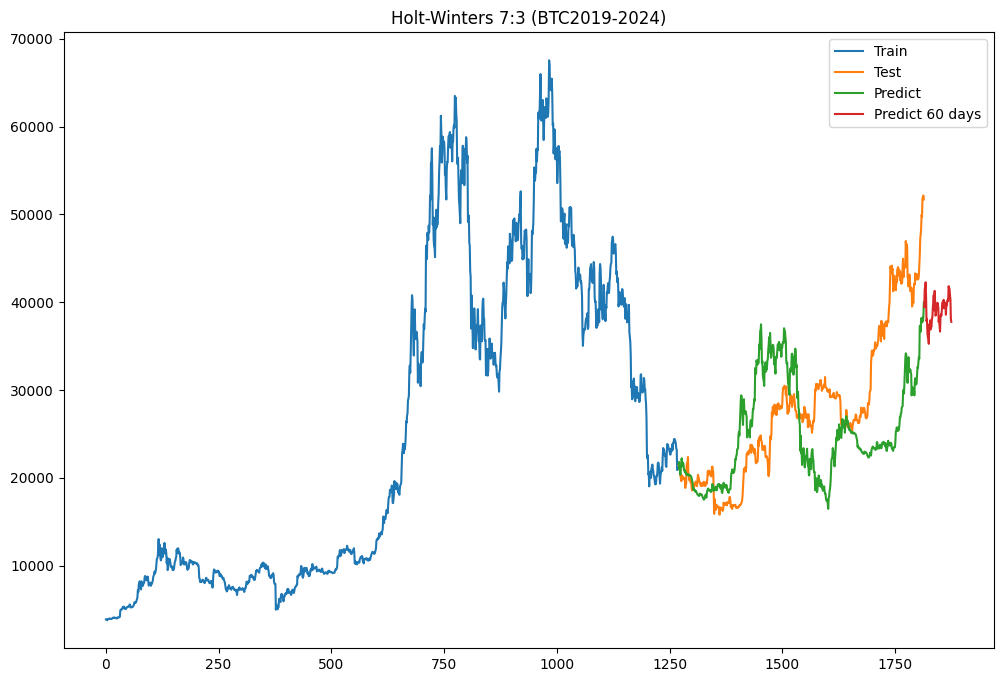

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    39448.778039
1816    41499.738020
1817    41604.432450
1818    42272.811242
1819    40696.817092
            ...     
1901    32772.763922
1902    32579.587892
1903    31205.408722
1904    30861.419144
1905    27851.717499
Length: 91, dtype: float64


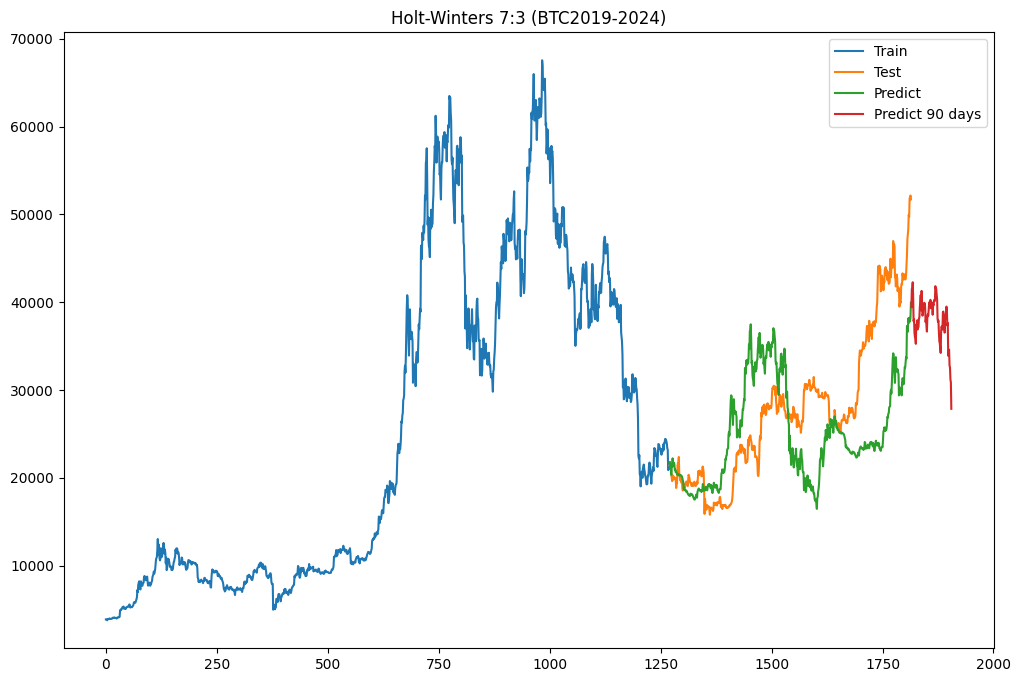

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

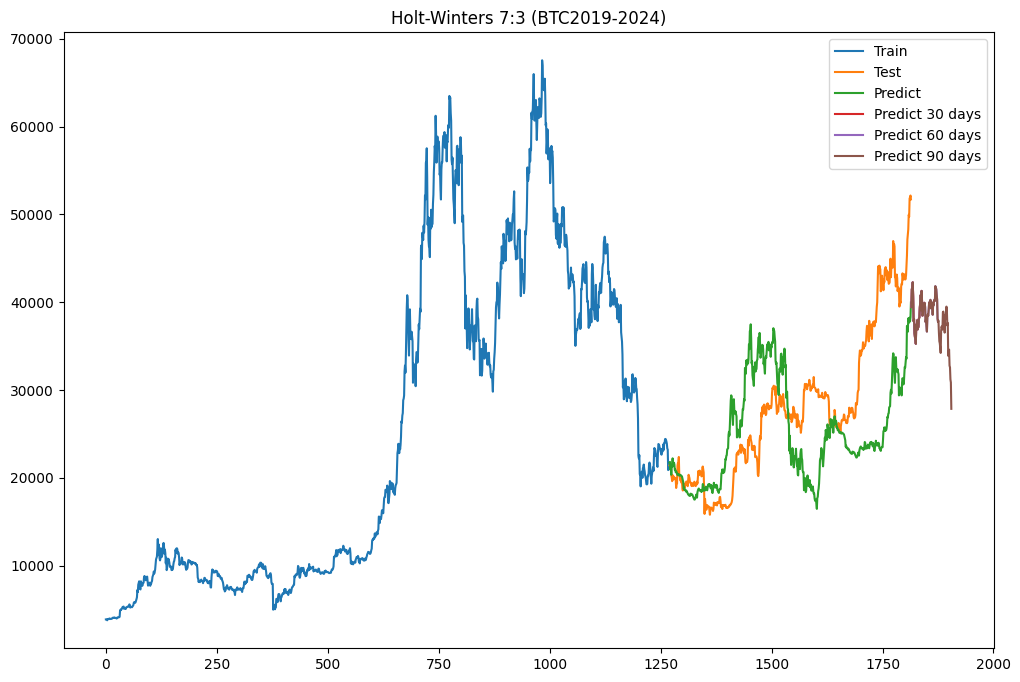

In [14]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()